In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("nba_stats.csv")
df.head()

,Unnamed: 0,Player,Ratings,Salaries,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,LeBron James,97,"$37,436,858",PG,35,LAL,60,60,34.9,...,0.697,1.0,6.9,7.9,10.6,1.2,0.5,4.0,1.8,25.7
1,1,Kawhi Leonard,97,"$32,742,000",SF,28,LAC,51,51,32.2,...,0.889,1.0,6.3,7.3,5.0,1.8,0.6,2.7,1.9,26.9
2,2,Giannis Antetokounmpo,96,"$25,842,697",PF,25,MIL,57,57,30.9,...,0.633,2.3,11.5,13.7,5.8,1.0,1.0,3.7,3.0,29.6
3,3,James Harden,96,"$38,199,000",SG,30,HOU,61,61,36.7,...,0.861,1.0,5.3,6.4,7.4,1.7,0.9,4.5,3.4,34.4
4,4,Stephen Curry,95,"$40,231,758",PG,31,GSW,5,5,27.8,...,1.000,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8


In [3]:
df.shape

(414, 32)

In [4]:
df.isnull().any().count()

32

In [5]:
## Drop the nan values 
df.dropna(how="any", inplace=True)


In [6]:
df.shape

(385, 32)

In [7]:
df.describe()

,Unnamed: 0,Ratings,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,212.680519,76.480519,26.166234,41.418182,21.228571,21.934545,3.655325,8.083377,0.447431,1.115325,...,0.751065,0.886494,3.123636,4.007532,2.210130,0.705714,0.454026,1.289351,1.896364,10.014545
std,127.032678,5.484377,3.908911,18.584385,22.834315,8.364382,2.321745,4.844991,0.086046,0.871182,...,0.134599,0.740618,1.841574,2.425488,1.852905,0.418540,0.429196,0.869187,0.716209,6.496529
min,0.000000,68.000000,19.000000,1.000000,0.000000,3.200000,0.100000,0.800000,0.143000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.300000,0.400000
25%,101.000000,73.000000,23.000000,27.000000,1.000000,15.300000,1.900000,4.400000,0.402000,0.400000,...,0.681000,0.400000,1.800000,2.300000,1.000000,0.400000,0.200000,0.700000,1.400000,5.000000
50%,211.000000,75.000000,26.000000,45.000000,11.000000,22.200000,3.200000,6.800000,0.439000,1.000000,...,0.774000,0.700000,2.800000,3.500000,1.600000,0.600000,0.300000,1.000000,1.900000,8.500000
75%,320.000000,79.000000,29.000000,58.000000,43.000000,29.000000,4.800000,11.100000,0.485000,1.600000,...,0.833000,1.100000,4.000000,5.100000,3.000000,0.900000,0.500000,1.700000,2.300000,13.000000
max,441.000000,97.000000,38.000000,66.000000,65.000000,36.900000,10.900000,22.900000,1.000000,4.400000,...,1.000000,4.600000,11.500000,15.800000,10.600000,2.100000,3.100000,4.800000,4.000000,34.400000


C:\Users\nikos\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


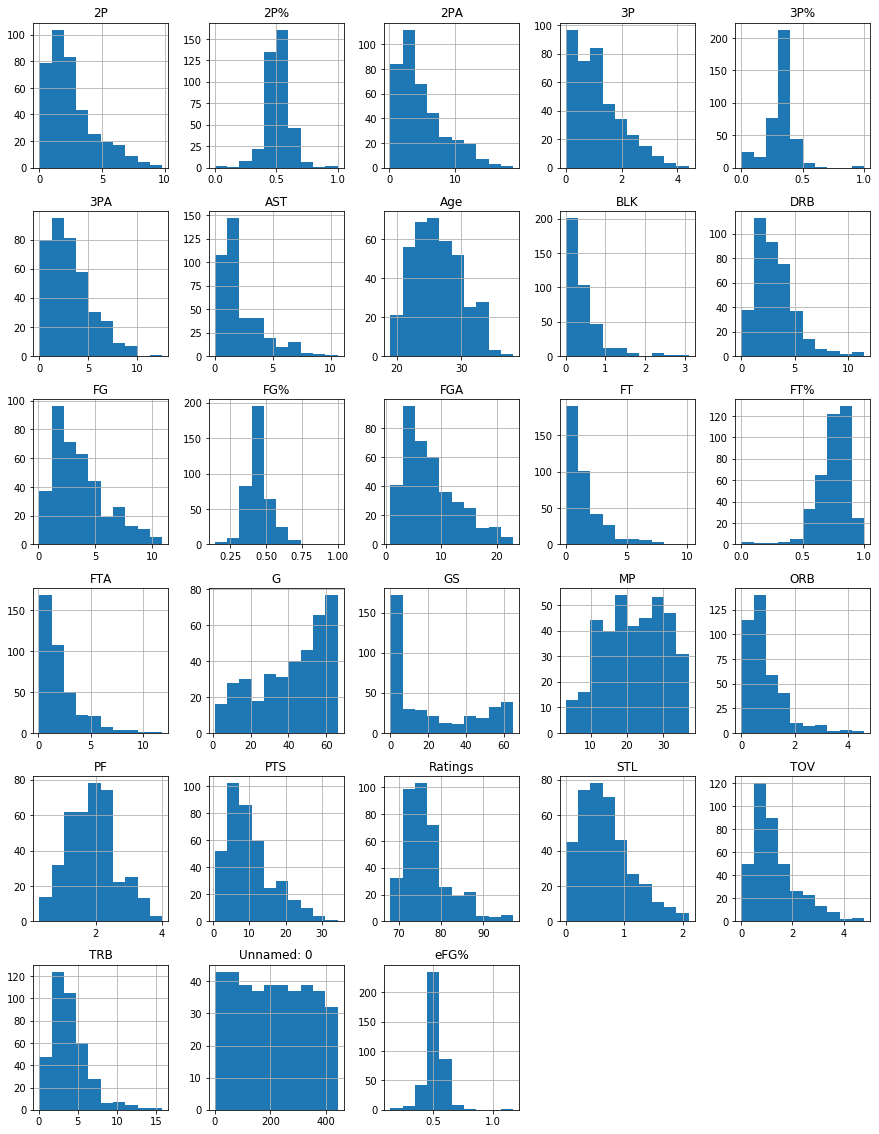

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [9]:
## Lets try to create a model that can recommend players to general managers that they are trying to creat a team
## Firstly a manager has many features to examine before choosing a player. For instance, lest try to find a player that can be a good fit
## for Giannis Antentokoumbo in order to cover his weaknesses, we are looking for a player with a good 3p accuracy, ambitious(a young palyer who want to win a championship)
## with many shoot attempts per game and creative with the ball on is hand.
## Let's pick these features
df.columns

Index(['Unnamed: 0', 'Player', 'Ratings', 'Salaries', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
df.loc[df["Player"]=="Giannis Antetokounmpo"].T

,2
Unnamed: 0,2
Player,Giannis Antetokounmpo
Ratings,96
Salaries,"$25,842,697"
Pos,PF
Age,25
Tm,MIL
G,57
GS,57
MP,30.9


In [11]:
X = df[["Age","3P%","3PA","2P%","AST","TOV","PTS"]]

In [12]:
## Define the target values
target = [27, 0.40, 6,0.45, 6, 3, 20]

In [13]:
## Lets find the players using the neirest neighbors technique 

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=3).fit(X)

In [14]:
print(model.kneighbors([target]))

(array([[1.47975978, 2.23484966, 2.58451794]]), array([[56, 33, 41]], dtype=int64))


In [15]:
print(df.iloc[56])
print(df.iloc[33])
print(df.iloc[41])


Unnamed: 0                   58
Player        Spencer Dinwiddie
Ratings                      82
Salaries            $10,605,600
Pos                          SG
Age                          26
Tm                          BRK
G                            64
GS                           49
MP                         31.2
FG                          6.6
FGA                          16
FG%                       0.415
3P                          1.9
3PA                         6.3
3P%                       0.308
2P                          4.7
2PA                         9.7
2P%                       0.485
eFG%                      0.476
FT                          5.4
FTA                           7
FT%                       0.778
ORB                         0.5
DRB                           3
TRB                         3.5
AST                         6.8
STL                         0.6
BLK                         0.3
TOV                         2.7
PF                          2.8
PTS     

In [16]:
## As we can see one of the recomandation that the algorith made was cris middleton who is currently antetokoumbo teammate, based on that 
## lets try to make our research most specific and search a good point guard to fit with Giannis and Middleton with a salary close to 20m

In [17]:
df.head()

,Unnamed: 0,Player,Ratings,Salaries,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,LeBron James,97,"$37,436,858",PG,35,LAL,60,60,34.9,...,0.697,1.0,6.9,7.9,10.6,1.2,0.5,4.0,1.8,25.7
1,1,Kawhi Leonard,97,"$32,742,000",SF,28,LAC,51,51,32.2,...,0.889,1.0,6.3,7.3,5.0,1.8,0.6,2.7,1.9,26.9
2,2,Giannis Antetokounmpo,96,"$25,842,697",PF,25,MIL,57,57,30.9,...,0.633,2.3,11.5,13.7,5.8,1.0,1.0,3.7,3.0,29.6
3,3,James Harden,96,"$38,199,000",SG,30,HOU,61,61,36.7,...,0.861,1.0,5.3,6.4,7.4,1.7,0.9,4.5,3.4,34.4
4,4,Stephen Curry,95,"$40,231,758",PG,31,GSW,5,5,27.8,...,1.000,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8


In [18]:
# The salary is an Object type, I will try to convert to numerical tyoe 
df.Salaries.dtypes

dtype('O')

In [19]:
df["Salary"] = df["Salaries"].str[1:]
df["Salary"] = df["Salary"].apply(lambda x: x.replace(",",""))
df.Salary.astype(str).astype(int)

0      37436858
1      32742000
2      25842697
3      38199000
4      40231758
         ...   
406     1254933
407     1254933
408     1254933
409      522738
410       79568
Name: Salary, Length: 385, dtype: int32

In [20]:
df2 = pd.get_dummies(df, columns=['Pos'])

In [140]:
df2.to_csv('nba_data.csv')
df2.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Position'],
      dtype='object')

In [22]:
## Lets pick again features with the position this time
X1 = df2[["Salary","Age","3P%","3PA","2P%","AST","TOV","PTS","Pos_PG"]]
X1.head()

,Salary,Age,3P%,3PA,2P%,AST,TOV,PTS,Pos_PG
0,37436858,35,0.349,6.4,0.570,10.6,4.0,25.7,1
1,32742000,28,0.366,5.7,0.510,5.0,2.7,26.9,0
2,25842697,25,0.306,4.8,0.622,5.8,3.7,29.6,0
3,38199000,30,0.352,12.6,0.538,7.4,4.5,34.4,0
4,40231758,31,0.245,9.8,0.636,6.6,3.2,20.8,1


In [23]:
target2 = [20000000,27, 0.40, 6,0.45, 6, 3, 20, 1]

In [24]:
model2 = NearestNeighbors(n_neighbors=3).fit(X1)
print(model2.kneighbors([target2]))

(array([[4.34502589e+00, 1.05263000e+05, 1.36364000e+05]]), array([[ 47, 120,  63]], dtype=int64))


In [25]:
print(df2.iloc[47])
print(df2.iloc[120])
print(df2.iloc[63])

Unnamed: 0                 49
Player        Malcolm Brogdon
Ratings                    83
Salaries          $20,000,000
Age                        27
Tm                        IND
G                          48
GS                         48
MP                       30.7
FG                          6
FGA                      13.7
FG%                     0.439
3P                        1.3
3PA                       4.1
3P%                     0.313
2P                        4.8
2PA                       9.7
2P%                     0.491
eFG%                    0.485
FT                          3
FTA                       3.4
FT%                     0.895
ORB                       0.8
DRB                       3.9
TRB                       4.7
AST                       7.1
STL                       0.7
BLK                       0.2
TOV                       2.4
PF                        1.8
PTS                      16.3
Salary               20000000
Pos_C                       0
Pos_C-PF  